>  Welcome to the Data Investigation project! 

# Project: Investigate a Dataset - [Database_No_show_appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#Limit">Limitations</a></li>    
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

 **data set**: This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointments. Several characteristics about the patient are included in each row.
> In this dataset, we will discuss the effects of various factors on patients who do not show up for doctor appointments. These factors include:
PatientId, AppointmentID, Gender, ScheduledDay, AppointmentDay, Age, Neighborhood, Scholarship, Hypertension, Diabetes, Alcoholism, Handicap, SMS_received, No-show.


### Questions for Analysis

**Q1: Is a certain gender is associated with higher no show?**



**Q2: What conditions that have the bigger impact on no show patients?**  




**Q3: what are the age gropes associated with higher no show?**



**Q4: what are the impact of sms on attendance?**


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import os
os.getcwd()

'd:\\Documents\\Data Analysis\\projects\\No show project'

In [3]:
df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")

In [4]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='wrangling'></a>
## Data Wrangling

 ### viewing the basic info of the data set (info)

In [5]:
# data frame characteristics
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


### viewing the NaN by column

In [6]:
# NaN inspection 
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

### veiwing the statistics of the data frame (discribe)

In [7]:
# viewing the statistics of the data frame
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### veiwing the counts and and central tendancies of values in each column (hist)

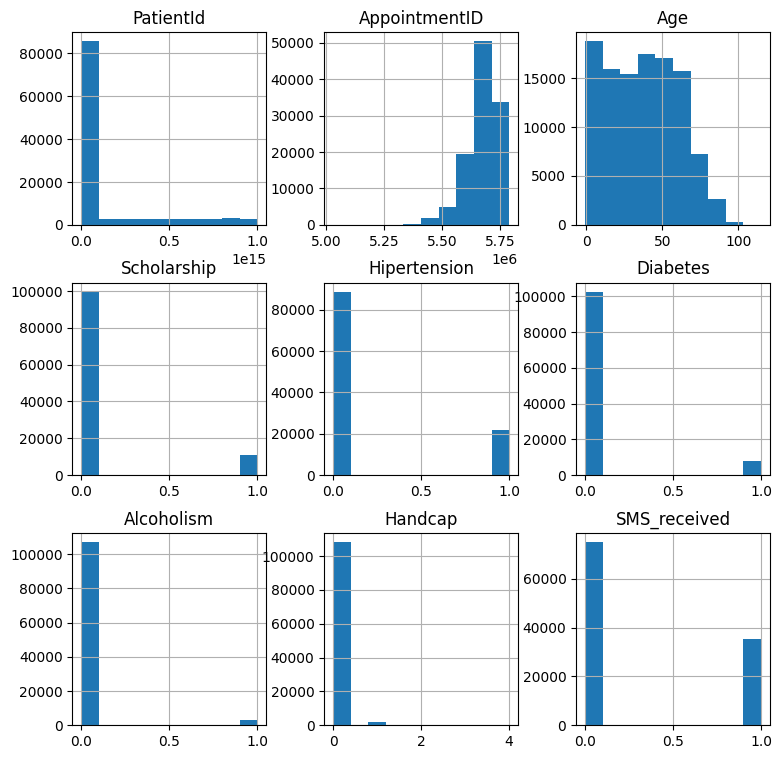

In [8]:
# taking a look at the relations between variables
df.hist(figsize=(9,9));


### Data Cleaning
 

In [9]:
# drop PatientId & 'AppointmentID columns as the are useless to this analysis
df.drop(['PatientId', 'AppointmentID'], axis = 1, inplace =True)

In [10]:
# checking the data types of the columns and names
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Gender          110527 non-null  object
 1   ScheduledDay    110527 non-null  object
 2   AppointmentDay  110527 non-null  object
 3   Age             110527 non-null  int64 
 4   Neighbourhood   110527 non-null  object
 5   Scholarship     110527 non-null  int64 
 6   Hipertension    110527 non-null  int64 
 7   Diabetes        110527 non-null  int64 
 8   Alcoholism      110527 non-null  int64 
 9   Handcap         110527 non-null  int64 
 10  SMS_received    110527 non-null  int64 
 11  No-show         110527 non-null  object
dtypes: int64(7), object(5)
memory usage: 10.1+ MB


In [11]:
# making column labels in lower case and fixing the column names
df.rename(columns={"Hipertension": "hypertension", "Handcap":"handicap"}, inplace=True)
df.rename(columns=lambda x: x.lower(), inplace=True)  

In [12]:
# placing the (-) with the (_) in the no-show fo consistency
df.rename(columns = {"no-show": 'no_show'}, inplace=True)

In [13]:
df.head(2)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis

<ul>
<li><a href="#q1"> Q1: what is the ratio of no show vs who attended ? </a></li>

- For this question,we will compare the ratio of whom who attended vs whom didn't attend the appointment.

<li><a href="#q2"> Q2: Is a certain gender is associated with higher no show? </a></li>

- For this question,we will compare the average no_show for both genders.

<li><a href="#q3"> Q3: What conditions that have the bigger impact on no show patient? </a></li>  

- we will compare the effect of medical conditions over no_show.


<li><a href="#q4"> Q4: what are the age gropes associated with higher no show? </a></li>

- devidin ages into a clear groups which an be easily distinguished:

- age groups:

 1- Child: 0 to 18 

 2- Youth: 18 to 37

 3- Mature: 37 to 55

 4- Elders: 55 to 115

<li><a href="#q5"> Q5: what are the impact of sms on attendance? </a></li>    
- investigating the effect of sms on non attended patient.

</ul>



<a id='q1'></a>
### Research Question 1 ( what is the raio of no show vs who attended?)  

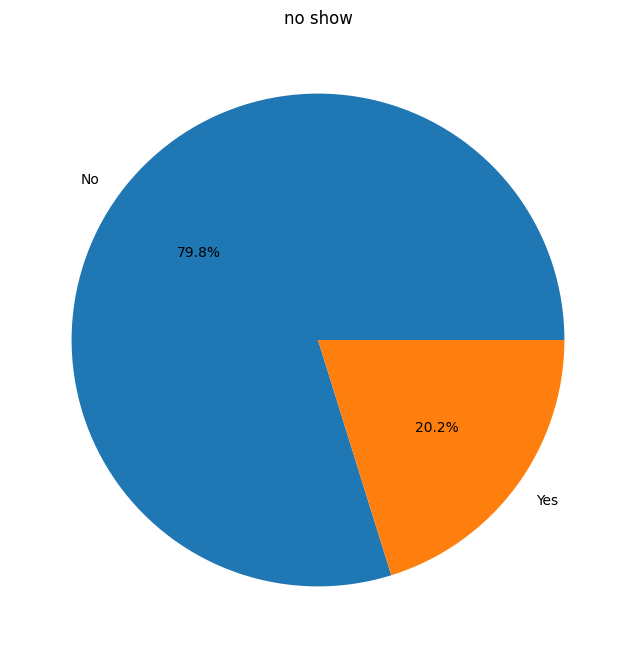

In [14]:
# plotting the no show ratios the plot
df.groupby('no_show').size().plot(kind='pie',autopct='%1.1f%%', subplots=True, figsize=(8, 8));
plt.title('no show')
plt.ylabel(None)
plt.show()


- **it seems that the unattended ratio is 20% which is relatively a lot.**

<a id='q2'></a>
### Research Question 2 (Is a certain gender is associated with higher no show?)

In [15]:
#replacing yes & no with floats fo analytic convenience
df['no_show'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
#- as most of the columns in the data se is consisting of 1 & 0, the mean function is not working properly so i will get the mean manually by dividing the number instance of (1) in the no_show column 'unattended patients' 
# over the total number of values in the no_show column()
# and did that for similar columns
#- iam using slicing to get the intends value EX: t = (df.shape)[0] >>> 110527

In [17]:
# inspecting the number of rows in the entire data frame
df.shape

(110527, 12)

In [18]:
#t is the number of values in the entire data frame
t = (df.shape)[0] 

In [19]:
#testing output
print("total no. of values =",t)

total no. of values = 110527


In [20]:
#separating the unattended patients
no = df.query('no_show == "Yes"')
no.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
6,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
11,M,2016-04-26T08:44:12Z,2016-04-29T00:00:00Z,29,NOVA PALESTINA,0,0,0,0,0,1,Yes
17,F,2016-04-28T09:28:57Z,2016-04-29T00:00:00Z,40,CONQUISTA,1,0,0,0,0,0,Yes
20,F,2016-04-27T07:51:14Z,2016-04-29T00:00:00Z,30,NOVA PALESTINA,0,0,0,0,0,0,Yes


In [21]:
df.gender.replace({"F":'Female', "M":'Male'},inplace = True)

C:\Users\Abdalrhman\AppData\Local\Temp\ipykernel_19020\2794477030.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.gender.replace({"F":'Female', "M":'Male'},inplace = True)


In [22]:
g= df.groupby(["no_show", "gender"]).size().unstack('gender').apply(lambda x: x/x.sum())
g

gender,Female,Male
no_show,,
No,0.796854,0.800321
Yes,0.203146,0.199679


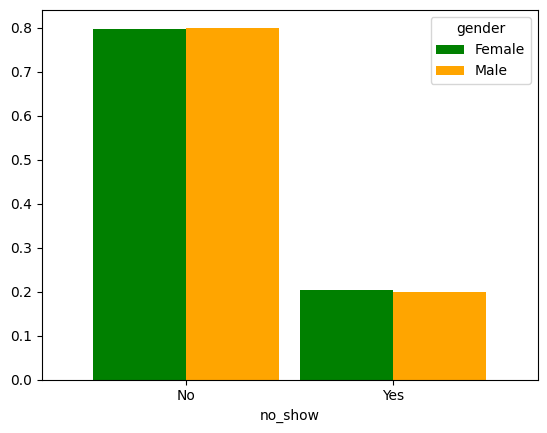

In [23]:
g.plot.bar(rot = 0, width = 0.9, color = ['green','orange']);

- **in general femaels are more likely to not show up in an appointment.**

<a id='q3'></a>
### Research Question 3 (What conditions that have the bigger impact on no show patients?)  

In [24]:
# Using query to get the mean no show of a specific medical condition
mid = no[['hypertension','diabetes','alcoholism','handicap']].mean()
m = {'med. condition mean':[mid[0],mid[1],mid[2],mid[3]]}
mc = pd.DataFrame(m, index=['hypertension','diabetes','alcoholism','handicap'])
mc

C:\Users\Abdalrhman\AppData\Local\Temp\ipykernel_19020\2028214811.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  m = {'med. condition mean':[mid[0],mid[1],mid[2],mid[3]]}


,med. condition mean
hypertension,0.169004
diabetes,0.064071
alcoholism,0.030333
handicap,0.020297


### investigating specific rows in the df (ilock)

In [25]:
df.iloc[lambda df: [5,8],:]

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
5,Female,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
8,Female,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No


### investegating spacific columns in the df (ilock)

In [26]:
df.iloc[:, lambda df: [0, 2]].head()

,gender,appointmentday
0,Female,2016-04-29T00:00:00Z
1,Male,2016-04-29T00:00:00Z
2,Female,2016-04-29T00:00:00Z
3,Female,2016-04-29T00:00:00Z
4,Female,2016-04-29T00:00:00Z


### changing the values of a column

In [ ]:
# create a single df to view the outcomes using unstack()
j = pd.DataFrame()
j['v'] = no['hypertension'].replace({1:'yh, ', 0:'nh, '})
j['x'] = no['diabetes'].replace({1:'yh, ', 0:'nh, '})
j['r'] = no['alcoholism'].replace({1:'ya, ', 0:'na, '})
j['k'] = no['handicap'].replace({1:'yc', 0:'nc'})
j = j.assign(con = np.nan)
j['con'] = (j['v'])+(j['x'])+(j['r'])+(j['k'].astype(str))


In [28]:
j.head()

,v,x,r,k,con
6,"nh,","nh,","na,",nc,"nh, nh, na, nc"
7,"nh,","nh,","na,",nc,"nh, nh, na, nc"
11,"nh,","nh,","na,",nc,"nh, nh, na, nc"
17,"nh,","nh,","na,",nc,"nh, nh, na, nc"
20,"nh,","nh,","na,",nc,"nh, nh, na, nc"


In [29]:
j.drop(['v', 'x', 'r', 'k'], axis = 1, inplace = True)


In [30]:
j.head()

,con
6,"nh, nh, na, nc"
7,"nh, nh, na, nc"
11,"nh, nh, na, nc"
17,"nh, nh, na, nc"
20,"nh, nh, na, nc"


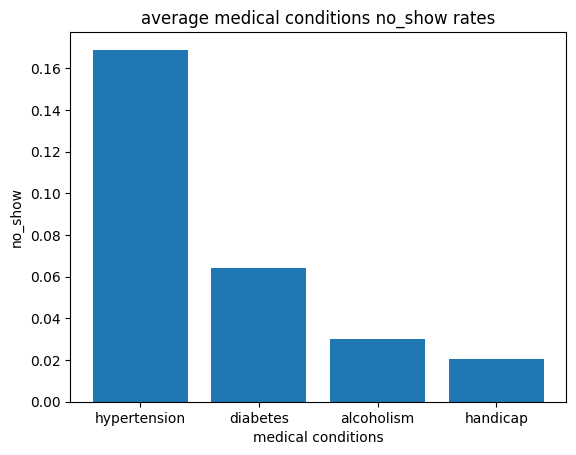

In [31]:
# Create a bar chart of no show age groups and compare there effects
locations = [1, 2, 3, 4]  
heights =  mid

labels = ["hypertension", "diabetes", "alcoholism", "handicap"]

plt.bar(locations, heights, tick_label=labels)
plt.title('average medical conditions no_show rates')
plt.xlabel('medical conditions')
plt.ylabel('no_show');

- **It looks like hypertension patients are the most likely to not show up, followed by diabetes, alcoholism & handicap, whose patients are the most likely to show up.**

<a id='q4'></a>
### Research Question 4  (what are the age gropes associated with higher no show?)

In [32]:
#inspecting age statistics
df.age.describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

In [33]:
# delleting the false age of -1
df.drop((df[df["age"] == -1.000000 ].index),inplace= True)

In [34]:
df.age.describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

In [35]:
# getting the values of group ages
ch = no.age.describe()[3]
yu = no.age.describe()[4]
ma = no.age.describe()[5]
ol = no.age.describe()[6]
el = no.age.describe()[7]

C:\Users\Abdalrhman\AppData\Local\Temp\ipykernel_19020\2496347589.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ch = no.age.describe()[3]
C:\Users\Abdalrhman\AppData\Local\Temp\ipykernel_19020\2496347589.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  yu = no.age.describe()[4]
C:\Users\Abdalrhman\AppData\Local\Temp\ipykernel_19020\2496347589.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ma = no.age.describe()[5]
C:\U

In [36]:
#deviding age into age groups

edges =[ch,yu,ma,ol,el]
names = ['child','youth','mature','old']
df['age_group'] = pd.cut(df['age'], edges, labels = names)
df['age_group'].head()

0      old
1      old
2      old
3    child
4      old
Name: age_group, dtype: category
Categories (4, object): ['child' < 'youth' < 'mature' < 'old']

C:\Users\Abdalrhman\AppData\Local\Temp\ipykernel_19020\2959509798.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.query('no_show == "Yes"').groupby(['age_group']).size().plot(ylabel = 'no_show', title = "distribution of no_show by age_group",kind = 'bar', color = ['green', 'red', 'magenta', 'blue']);


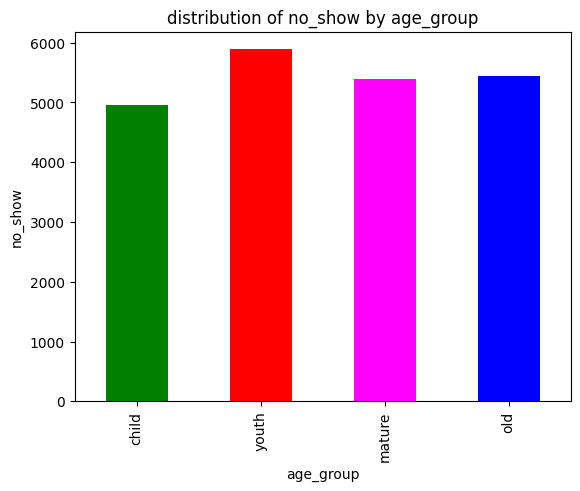

In [37]:
# setting the graph
df.query('no_show == "Yes"').groupby(['age_group']).size().plot(ylabel = 'no_show', title = "distribution of no_show by age_group",kind = 'bar', color = ['green', 'red', 'magenta', 'blue']);



- **youth are the most expected to no_show while elders have less attendency to no_show** 

<a id='q5'></a>
### Research Question 5 (what are the impact of sms on attendance)?

In [ ]:
# calculating the mean of received sms and non received sms for unattended patients

y = df.query(f'sms_received == {1} and no_show == "Yes"').shape[0]
n = df.query(f'sms_received == {0} and no_show == "Yes"').shape[0]

mean_y = y/t
mean_n = n/t

the mean of patients who have received sms and did`nt attend = 0.08852135677255331
the mean of patients who have`nt received sms and did`nt attend = 0.11341120269255477


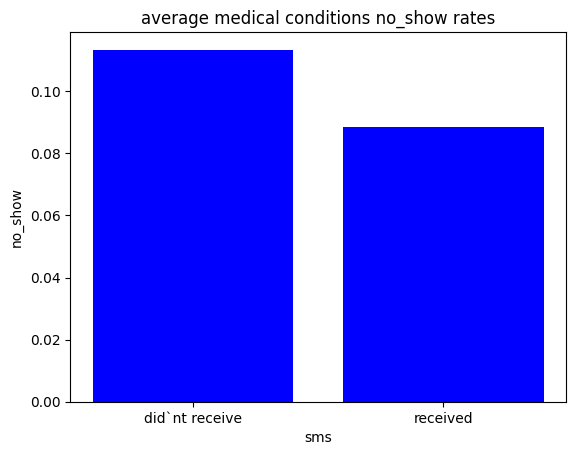

In [39]:
# making a graph out of the findings
location = [1, 2]  
height = [mean_n,mean_y]
label = ["did`nt receive", "received"]

plt.bar(location, height, tick_label=label, color = 'blue') 
plt.title('average medical conditions no_show rates')
plt.xlabel('sms')
plt.ylabel('no_show');

print('the mean of patients who have received sms and did`nt attend =', mean_y)
print('the mean of patients who have`nt received sms and did`nt attend =', mean_n)

- **pationts who recieved an sms are lee likely to not show** 

### saving the work

In [40]:
df.to_csv('project2_solution.csv')

<a id='conclusions'></a>
## Conclusions

> Gender has a pronounced effect on the probability of no show, while medical condition can have a more dramatic impact on attendance, according to the condition itself, where age has less impact on attendance. Finally, SMS reminders have a small but positive effect on reminding patients to show up. 

<a id='Limit'></a>
## Limitations


> **First**:
Most of the columns in the dataset is constructed of 1s & 0s mean function is not working properly so i got the mean manually by dividing the number instance of (1) in the no_show column 'unattended patients' over the total number of values in the no_show column() and did that for similar columns. 

> **Second**:
As there are some variables that give more than the intended outcome, for example: t = df.shape ----> (110527, 14), 
Iam using .list() and slicing to get the intended values of the total number of values of unattended patients for no_show column or the number of values that reflect a unattended patients for the other columns and the total number of values in the entire data frame EX: t = (df.shape)[0] ----> 110527.
